# ARCHISHA SINHA

a. Classify the test images as low contrast, high contrast, dark and bright images by plotting their histograms.

b. Implement histogram equalization on the low contrast, dark and bright images

c. Examine the effect of equalization on the test images by comparing the histograms of the test images with the equalized images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Method 1
def histoNew(imgOri):
  r=np.arange(0,256, dtype=int)
  count=np.zeros(len(r), dtype=int)
  for k in r:
    count[k]=(imgOri==k).sum()
  return (r,count)

In [ ]:
#Method 2
def hist_plot(img):
  m,n= img.shape
  nk= []
  rk=[]
  for r in range(256):
    count= 0
    rk.appenmd(r)
    for i in range(m):
      for j in range(n):

        if img[i,j]==r:
          count+=1
  rk.append(count)
  return (rk,nk)


img1= cv2.imread('/content/image1.tif', 0)

img2= cv2.imread()

In [ ]:
img1 = cv2.imread('Fig0316(1)(top_left).tif',0)
img2 = cv2.imread('Fig0316(2)(2nd_from_top).tif',0)
img3 = cv2.imread('Fig0316(3)(third_from_top).tif',0)
img4 = cv2.imread('Fig0316(4)(bottom_left).tif',0)

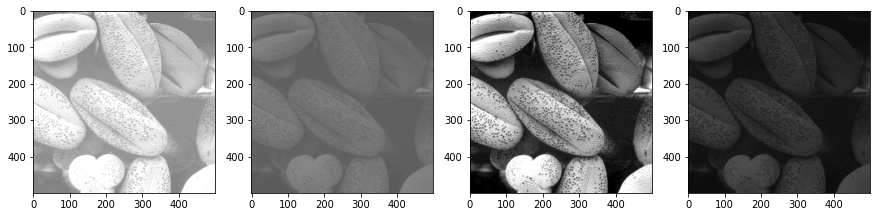

In [ ]:
images=np.array([img1,img2,img3,img4])
plt.figure(figsize= (15,15))

for i in range(len(images)):
  plt.subplot(1,len(images+1),i+1)
  plt.imshow(images[i],cmap='gray', vmin=0, vmax=255)

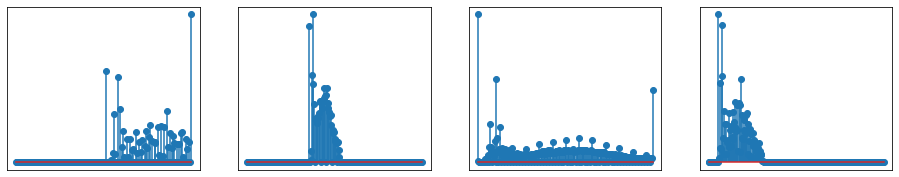

In [ ]:
plt.figure(figsize= (20,3))
for i in range(len(images)):
  intensity,frequency= histoNew(images[i])
  plt.subplot(1,len(images)+1,i+1)
  plt.stem(intensity,frequency)
  plt.xticks([])
  plt.yticks([])

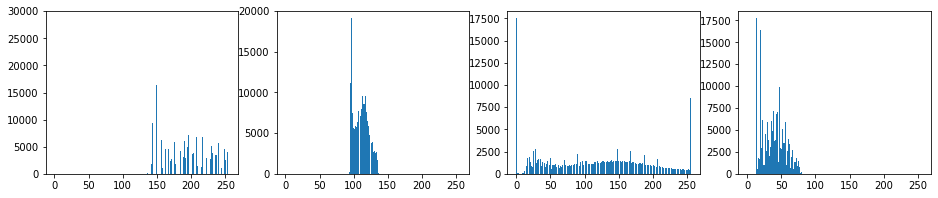

In [ ]:
plt.figure(figsize= (20,3))
for i in range(len(images)):
  plt.subplot(1,len(images)+1,i+1)
  plt.hist(images[i].ravel(),256, [0,256])

In [ ]:
n,m = img1.shape

# HISTOGRAM EQUALIZATION

In [ ]:
r,nk=histoNew(img1)

In [ ]:
rnk=[]

nk=np.array(nk)
pdf= nk/(m*n)
pdf1= pdf.copy()
cdf= np.array(np.zeros(len(pdf)))
# for i in pdf:
#   cdf[i]=pdf[i]

for i in range(1,len(pdf)):
  cdf[i]= cdf[i-1]+pdf[i]

sk= cdf*255
sk= sk.astype(int)

In [ ]:
imgEqu= np.zeros((m,n), dtype=int) #create a matrix for equalized image
#replace the pixel value in the original image by the pixel value sk obtained after equalization
for i in range(m):
  for j in range(n):
    temp= img1[i,j]
    imgEqu[i,j]= sk[temp]

imgEqu= imgEqu.astype('int')

In [ ]:
#to plot the histogram of original and new image
r,nk= histoNew(img1)
s,nk1= histoNew(imgEqu)

Text(0, 0.5, 'nk1')

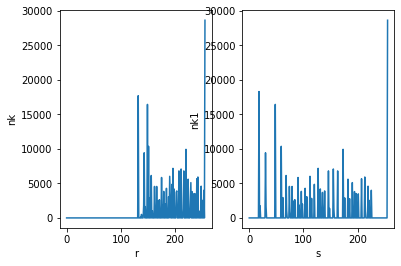

In [ ]:


plt.subplot(1,2,1)
plt.plot(r,nk)
plt.xlabel('r')
plt.ylabel('nk')

plt.subplot(1,2,2)
plt.plot(s,nk1)
plt.xlabel('s')
plt.ylabel('nk1')